In [4]:
import numpy as np
import matplotlib.pyplot as plt
import Pk_library as PKL
from matplotlib.lines import Line2D
import cube
import plotPS as pps 
from figure import CustomFigure

# Information

Fundamental frequency: $k_F = 2\pi/\text{Boxsize}$

Nyquist frequency: $k_N = k_F\cdot\left\lfloor\frac{\text{ngrid}}{2}\right\rfloor = \pi/\Delta_{res}$


Bispectrum definition:

$$
    \langle \delta(\mathbf{k}_1)\delta(\mathbf{k}_2)\delta(\mathbf{k}_3)\rangle = (2\pi)^3 \delta_D(\mathbf{k}_1+\mathbf{k}_2+\mathbf{k}_3)B(\mathbf{k}_1,\mathbf{k}_2, \mathbf{k}_3)
$$

In [5]:
boxsize = 5120 #Mpc
ngrid = 256 #px
resolution = boxsize/ngrid #Mpc/px
kF = 2*np.pi/boxsize
kN = (ngrid//2)*kF

datapath = "/mn/stornext/d10/data/johanmkr/simulations/gevolution_first_runs/"
seed = 1234
gr_v_path = datapath + f"seed{seed:04d}/gr/gr_snap005_phi.h5"
newton_v_path = datapath + f"seed{seed:04d}/newton/newton_snap005_phi.h5"
gr_cube = cube.Cube(gr_v_path)
newton_cube = cube.Cube(newton_v_path)

## Equilateral limit

Equilateral limit of bispectum, where $k_1=k_2=k_3$ and $\theta = \frac{2\pi}{3}$, where $\cos\theta=\hat{k}_1\cdot\hat{k}_2$.

In [6]:
array_of_ks = np.geomspace(kF, kN, 50)
def gen_equilateral_bispectrum(k_array):
    theta = 2*np.pi/3
    Bk_G = np.zeros(len(k_array))
    Qk_G = np.zeros(len(k_array))
    Bk_N = np.zeros(len(k_array))
    Qk_N = np.zeros(len(k_array))
    for i, k in enumerate(k_array):
        print(f"Calculating k = {k:.2e}...")
        BBkG = PKL.Bk(gr_cube.data.astype(np.float32), boxsize, k, k, np.array([theta]), "CIC", 16)
        BBkN = PKL.Bk(newton_cube.data.astype(np.float32), boxsize, k, k, np.array([theta]), "CIC", 16)
        Bk_G[i] = BBkG.B #*k**3/(2*np.pi**2)
        Qk_G[i] = BBkG.Q #*k**3/(2*np.pi**2)
        Bk_N[i] = BBkN.B #*k**3/(2*np.pi**2)
        Qk_N[i] = BBkN.Q #*k**3/(2*np.pi**2)
    return Bk_G, Qk_G, Bk_N, Qk_N



Calculating k = 1.23e-03...

Computing bispectrum of the field...
Time to compute bispectrum = 1.00

Computing bispectrum of the field...
Time to compute bispectrum = 0.99
Calculating k = 1.35e-03...

Computing bispectrum of the field...
Time to compute bispectrum = 0.98

Computing bispectrum of the field...
Time to compute bispectrum = 0.95
Calculating k = 1.50e-03...

Computing bispectrum of the field...
Time to compute bispectrum = 0.98

Computing bispectrum of the field...
Time to compute bispectrum = 0.95
Calculating k = 1.65e-03...

Computing bispectrum of the field...
Time to compute bispectrum = 1.01

Computing bispectrum of the field...
Time to compute bispectrum = 0.96
Calculating k = 1.82e-03...

Computing bispectrum of the field...
Time to compute bispectrum = 0.98

Computing bispectrum of the field...
Time to compute bispectrum = 0.95
Calculating k = 2.01e-03...

Computing bispectrum of the field...
Time to compute bispectrum = 0.99

Computing bispectrum of the field...
Ti

/tmp/ipykernel_915552/31505584.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


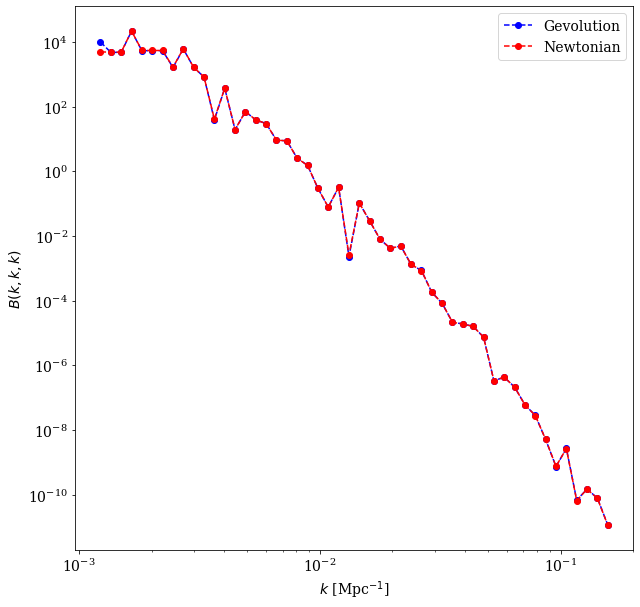

In [7]:

# array_of_ks
Bk_G, Qk_G, Bk_N, Qk_N = gen_equilateral_bispectrum(array_of_ks)


fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.loglog(array_of_ks, abs(Bk_G), "--bo", label="Gevolution")
ax.loglog(array_of_ks, abs(Bk_N), "--ro", label="Newtonian")
ax.set_xlabel(r"$k$ [Mpc$^{-1}$]")
ax.set_ylabel(r"$B(k,k,k)$")
ax.legend()
fig.show()


In [8]:
large_scale_ks = np.geomspace(kF, kF*4, 25)
Bk_G_large, Qk_G_large, Bk_N_large, Qk_N_large = gen_equilateral_bispectrum(large_scale_ks)

# array_of_ks

Calculating k = 1.23e-03...

Computing bispectrum of the field...
Time to compute bispectrum = 0.97

Computing bispectrum of the field...
Time to compute bispectrum = 0.96
Calculating k = 1.30e-03...

Computing bispectrum of the field...
Time to compute bispectrum = 0.94

Computing bispectrum of the field...
Time to compute bispectrum = 0.95
Calculating k = 1.38e-03...

Computing bispectrum of the field...
Time to compute bispectrum = 0.92

Computing bispectrum of the field...
Time to compute bispectrum = 0.97
Calculating k = 1.46e-03...

Computing bispectrum of the field...
Time to compute bispectrum = 0.95

Computing bispectrum of the field...
Time to compute bispectrum = 0.95
Calculating k = 1.55e-03...

Computing bispectrum of the field...
Time to compute bispectrum = 0.95

Computing bispectrum of the field...
Time to compute bispectrum = 0.95
Calculating k = 1.64e-03...

Computing bispectrum of the field...
Time to compute bispectrum = 0.95

Computing bispectrum of the field...
Ti

In [9]:
# fig, ax = plt.subplots(1, 1, figsize=(10,10))
# ax.loglog(large_scale_ks, abs(Bk_G_large), "b", alpha=0.6, label="Gevolution")
# ax.loglog(large_scale_ks, abs(Bk_N_large), "r", alpha=0.6, label="Newtonian")
# ax.set_xlabel(r"$k$ [Mpc$^{-1}$]")
# ax.set_ylabel(r"$B(k,k,k)$")
# ax.legend()
# fig.show()

In [10]:
seed_list = np.arange(0, 2000, 75)

gr_cubes = [cube.Cube(datapath + f"seed{seed:04d}/gr/gr_snap005_phi.h5") for seed in seed_list]
newton_cubes = [cube.Cube(datapath + f"seed{seed:04d}/newton/newton_snap005_phi.h5") for seed in seed_list]

In [11]:
seed_list

array([   0,   75,  150,  225,  300,  375,  450,  525,  600,  675,  750,
        825,  900,  975, 1050, 1125, 1200, 1275, 1350, 1425, 1500, 1575,
       1650, 1725, 1800, 1875, 1950])

In [12]:
# fig, ax = plt.subplots(1, 1, figsize=(10,10))
# Bk_G_tot = np.zeros(len(large_scale_ks))
# Bk_N_tot = np.zeros(len(large_scale_ks))

# for i, seed in enumerate(seed_list):
#     print(f"Calculating seed {seed}...")
#     gr_cube = gr_cubes[i]
#     newton_cube = newton_cubes[i]
#     Bk_G, Qk_G, Bk_N, Qk_N = gen_equilateral_bispectrum(large_scale_ks)
#     ax.loglog(large_scale_ks, abs(Bk_G), "b", lw=0.5, alpha=0.5)
#     ax.loglog(large_scale_ks, abs(Bk_N), "r", lw=0.5, alpha=0.5)
#     Bk_G_tot += Bk_G
#     Bk_N_tot += Bk_N
# ax.loglog(large_scale_ks, abs(Bk_G_tot)/len(seed_list), "b", lw=1.0, label="Gevolution")
# ax.loglog(large_scale_ks, abs(Bk_N_tot)/len(seed_list), "r", lw=1.0, label="Newtonian")
# ax.set_xlabel(r"$k$ [Mpc$^{-1}$]")
# ax.set_ylabel(r"$B(k,k,k)$")
# fig.show()

## Squeezed limit

In [13]:
# Generate squeezed limit 
def gen_squeezed_bispectrum(k_array, theta=9/10*np.pi):
    Bk_G = np.zeros(len(k_array))
    Qk_G = np.zeros(len(k_array))
    Bk_N = np.zeros(len(k_array))
    Qk_N = np.zeros(len(k_array))
    for i, k in enumerate(k_array):
        print(f"Calculating k = {k:.2e}...")
        BBkG = PKL.Bk(gr_cube.data.astype(np.float32), boxsize, k, k, np.array([theta]), "CIC", 16)
        BBkN = PKL.Bk(newton_cube.data.astype(np.float32), boxsize, k, k, np.array([theta]), "CIC", 16)
        Bk_G[i] = BBkG.B #*k**3/(2*np.pi**2)
        Qk_G[i] = BBkG.Q #*k**3/(2*np.pi**2)
        Bk_N[i] = BBkN.B #*k**3/(2*np.pi**2)
        Qk_N[i] = BBkN.Q #*k**3/(2*np.pi**2)
    return Bk_G, Qk_G, Bk_N, Qk_N

In [14]:
Bk_G, Qk_G, Bk_N, Qk_N = gen_squeezed_bispectrum(array_of_ks)

Calculating k = 1.23e-03...

Computing bispectrum of the field...
Time to compute bispectrum = 0.98

Computing bispectrum of the field...
Time to compute bispectrum = 0.98
Calculating k = 1.35e-03...

Computing bispectrum of the field...
Time to compute bispectrum = 0.97

Computing bispectrum of the field...
Time to compute bispectrum = 0.93
Calculating k = 1.50e-03...

Computing bispectrum of the field...
Time to compute bispectrum = 0.94

Computing bispectrum of the field...
Time to compute bispectrum = 0.93
Calculating k = 1.65e-03...

Computing bispectrum of the field...
Time to compute bispectrum = 0.93

Computing bispectrum of the field...
Time to compute bispectrum = 0.93
Calculating k = 1.82e-03...

Computing bispectrum of the field...
Time to compute bispectrum = 0.94

Computing bispectrum of the field...
Time to compute bispectrum = 0.96
Calculating k = 2.01e-03...

Computing bispectrum of the field...
Time to compute bispectrum = 1.00

Computing bispectrum of the field...
Ti

/tmp/ipykernel_915552/3092024694.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


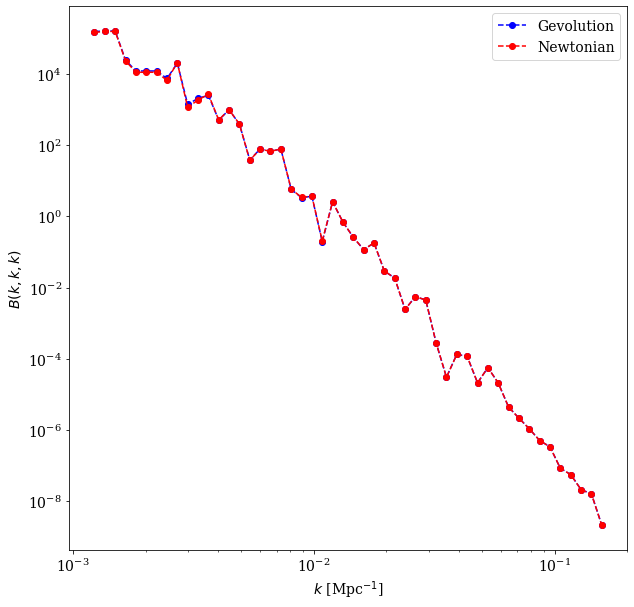

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.loglog(array_of_ks, abs(Bk_G), "--bo", label="Gevolution")
ax.loglog(array_of_ks, abs(Bk_N), "--ro", label="Newtonian")
ax.set_xlabel(r"$k$ [Mpc$^{-1}$]")
ax.set_ylabel(r"$B(k,k,k)$")
ax.legend()
fig.show()

In [19]:
Bk_G_large, Qk_G_large, Bk_N_large, Qk_N_large = gen_squeezed_bispectrum(large_scale_ks)

Calculating k = 1.23e-03...

Computing bispectrum of the field...
Time to compute bispectrum = 1.05

Computing bispectrum of the field...
Time to compute bispectrum = 1.00
Calculating k = 1.30e-03...

Computing bispectrum of the field...
Time to compute bispectrum = 0.96

Computing bispectrum of the field...
Time to compute bispectrum = 0.96
Calculating k = 1.38e-03...

Computing bispectrum of the field...
Time to compute bispectrum = 0.95

Computing bispectrum of the field...
Time to compute bispectrum = 0.95
Calculating k = 1.46e-03...

Computing bispectrum of the field...
Time to compute bispectrum = 0.94

Computing bispectrum of the field...
Time to compute bispectrum = 0.95
Calculating k = 1.55e-03...

Computing bispectrum of the field...
Time to compute bispectrum = 0.95

Computing bispectrum of the field...
Time to compute bispectrum = 0.95
Calculating k = 1.64e-03...

Computing bispectrum of the field...
Time to compute bispectrum = 0.92

Computing bispectrum of the field...
Ti

/tmp/ipykernel_915552/3617079308.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


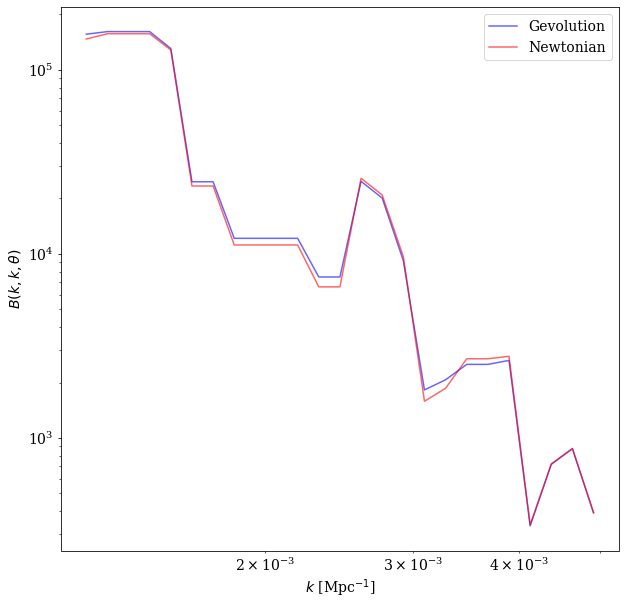

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.loglog(large_scale_ks, abs(Bk_G_large), "b", alpha=0.6, label="Gevolution")
ax.loglog(large_scale_ks, abs(Bk_N_large), "r", alpha=0.6, label="Newtonian")
ax.set_xlabel(r"$k$ [Mpc$^{-1}$]")
ax.set_ylabel(r"$B(k,k,\theta)$")
ax.legend()
fig.show()

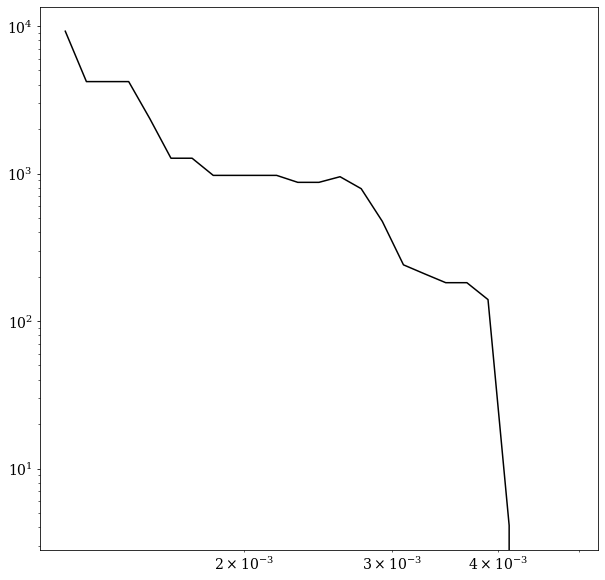

In [30]:
fig, ax = plt.subplots(1,1, figsize=(10,10))

ax.loglog(large_scale_ks, (Bk_G_large-Bk_N_large), "k", label="Gevolution")

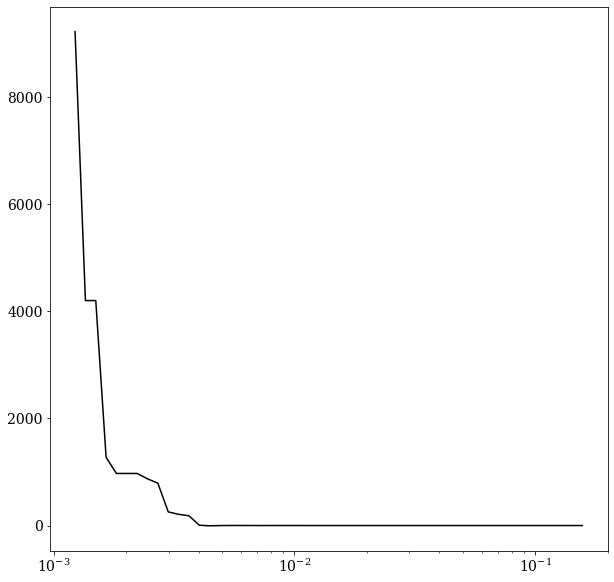

In [35]:
fig, ax = plt.subplots(1,1, figsize=(10,10))

ax.semilogx(array_of_ks, (Bk_G-Bk_N), "k", label="Gevolution")

In [15]:
# fig, ax = plt.subplots(1, 1, figsize=(10,10))
# Bk_G_tot = np.zeros(len(large_scale_ks))
# Bk_N_tot = np.zeros(len(large_scale_ks))

# for i, seed in enumerate(seed_list):
#     print(f"Calculating seed {seed}...")
#     gr_cube = gr_cubes[i]
#     newton_cube = newton_cubes[i]
#     Bk_G, Qk_G, Bk_N, Qk_N = gen_equilateral_bispectrum(large_scale_ks)
#     ax.loglog(large_scale_ks, abs(Bk_G), "b", lw=0.5, alpha=0.5)
#     ax.loglog(large_scale_ks, abs(Bk_N), "r", lw=0.5, alpha=0.5)
#     Bk_G_tot += Bk_G
#     Bk_N_tot += Bk_N
# ax.loglog(large_scale_ks, abs(Bk_G_tot)/len(seed_list), "b", lw=1.0, label="Gevolution")
# ax.loglog(large_scale_ks, abs(Bk_N_tot)/len(seed_list), "r", lw=1.0, label="Newtonian")
# ax.set_xlabel(r"$k$ [Mpc$^{-1}$]")
# ax.set_ylabel(r"$B(k,k,k)$")
# fig.show()

# Reduced Bispectra and three level PT

## Second order perturbation kernel - coupling function $F_2(\mathbf{k}_1, \mathbf{k}_2)$

From Bernardeu et al. 2002:

$$
    F_2(\mathbf{k}_1, \mathbf{k}_2) = \frac{5}{14}\left[\alpha(\mathbf{k}_1,\mathbf{k}_2) + \alpha(\mathbf{k}_2,\mathbf{k}_1)\right] +\frac{2}{7}\beta(\mathbf{k}_1,\mathbf{k}_2)
$$
where $\alpha(\mathbf{k}_1, \mathbf{k}_2)\equiv\frac{\mathbf{k}_{12}\cdot\mathbf{k}_1}{k_1^2}$ and $\beta(\mathbf{k}_1, \mathbf{k}_2)\equiv\frac{k_{12}^2(\mathbf{k}_1\cdot\mathbf{k}_2)}{2k_1^2k_2^2}$



alternatively:

$$
    F_2(\mathbf{k}_1,\mathbf{k}_2) = \frac{5}{7} + \frac{x}{2}\left(\frac{k_1}{k_2}+\frac{k_2}{k_1}\right)+\frac{2}{7}x^2,
$$
with $x=\hat{\mathbf{k}}_1\cdot\hat{\mathbf{k}}_2 = \cos\theta$, where $\theta$ is the angle spanned by $\mathbf{k}_1$ and $\mathbf{k}_2$.



In [16]:
def F2(k1,k2,theta):
    x = np.cos(theta)
    return 5./7 + x/2 * (k1/k2+k2/k1) / (k1*k2) + 2./7*x**2


theta_arr = np.linspace(0,np.pi,100)
k = 1.0

ret_arr_sim = F2(k,k,theta_arr)
ret_arr_half = F2(k,k/2,theta_arr)
ret_arr_quart = F2(k,k/4,theta_arr)


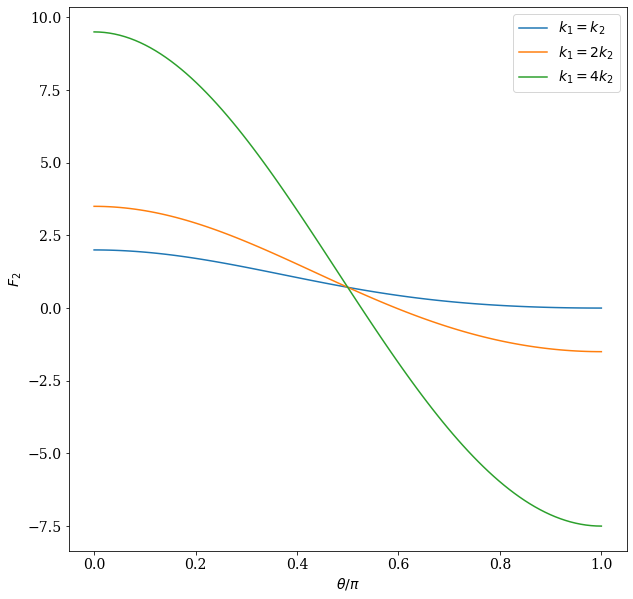

In [17]:
fig, ax = plt.subplots(figsize=(10,10))

ax.plot(theta_arr/np.pi, ret_arr_sim, label=r"$k_1=k_2$")
ax.plot(theta_arr/np.pi, ret_arr_half, label=r"$k_1=2k_2$")
ax.plot(theta_arr/np.pi, ret_arr_quart, label=r"$k_1=4k_2$")
ax.set_xlabel(r"$\theta/\pi$")
ax.set_ylabel(r"$F_2$")
ax.legend()